<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw2/hw2_arch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Architecture 5

I have modified Architecture 4 by adding batch normalization. I could achieve a maximum validation accuracy of 85.14% after running for 200 epochs with dropout 0.25 and 0.35.

### Imports

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Loading data

In [2]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

170500096/170498071 [==============================] - 30s 0us/step


In [3]:
train_images_original.shape, train_labels_original.shape,test_images_original.shape, test_labels_original.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Displaying some images

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
table = [[] for _ in range(10)]
for i in range(len(train_images_original)):
  label = train_labels_original[i, 0]
  table[label].append(i)

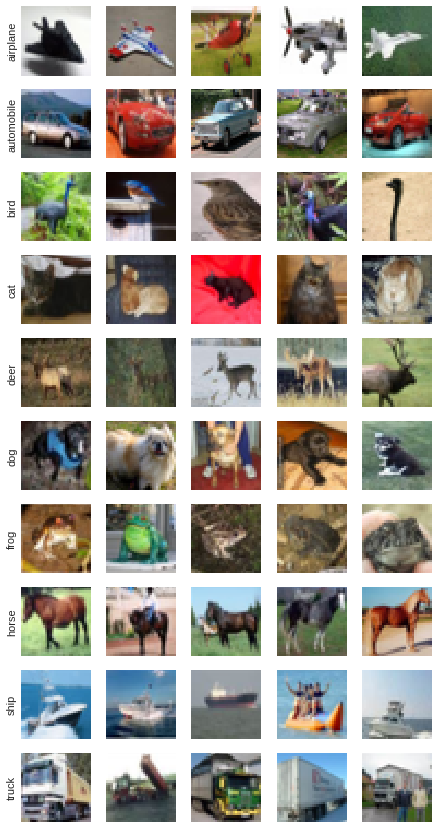

In [5]:
plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images_original[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

### Definition for Simple Holdout validation

In [0]:
def holdout_val(data,index):
  t_data = data[:index]
  val_data = data[index:]
  return t_data,val_data

### Preprocessing data

#### Shuffling the training dataset

Images before shuffling


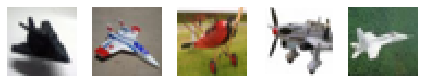

Images after shuffling


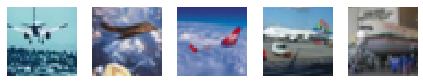

In [7]:
# Shuffling
index_shuffled = np.random.permutation(50000)
train_images_shuffled = train_images_original[index_shuffled]
train_labels_shuffled = train_labels_original[index_shuffled]

#Displaying few images before shuffling
print("Images before shuffling")
table = [[] for _ in range(10)]
for i in range(len(train_images_original)):
  label = train_labels_original[i, 0]
  table[label].append(i)
  
plt.figure(figsize=(15,15))
for class_index in range(1):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_original[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()  

# Displaying images after shuffling for same indices
print("Images after shuffling")
table = [[] for _ in range(10)]
for i in range(len(train_images_shuffled)):
  label = train_labels_shuffled[i, 0]
  table[label].append(i)
  
plt.figure(figsize=(15,15))
for class_index in range(1):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_shuffled[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()  

#### Splitting the original training data into training and validation data sets

In [8]:
# Getting the training the training and validation datasets
train_images, val_images = holdout_val(train_images_shuffled,40000)
train_labels,val_labels = holdout_val(train_labels_shuffled,40000)

train_images.shape,val_images.shape,train_labels.shape,val_labels.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

#### Flattening and reshaping of images

In [9]:
train_labels = keras.utils.to_categorical(train_labels,10) # Since we have 10 classes
val_labels =keras.utils.to_categorical(val_labels,10)
test_labels = keras.utils.to_categorical(test_labels_original,10)

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255
test_images = test_images_original.astype('float32')/255

train_images.shape, val_images.shape, test_images.shape, train_labels.shape, val_labels.shape, test_labels.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

### Building the model

In [10]:
batch_size = 128
num_epochs = 200


model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=train_images.shape[1:]))

#Layer2
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Layer 3
model.add(Conv2D(128, (3, 3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Dense layers
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(10, activation ='softmax'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

### Running the model

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr = 0.0005),
              metrics=['accuracy'])

datagen = ImageDataGenerator(  
        zca_epsilon=1e-06,  
        rotation_range=0,  
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip = False
        )

datagen.fit(train_images)

metrics = model.fit_generator(datagen.flow(train_images, train_labels,
                        batch_size=batch_size),
                        epochs=num_epochs,
                        steps_per_epoch =100,
                        validation_data=(val_images, val_labels), validation_steps = 50,
                        workers=4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
100/100 [==============================] - 14s 136ms/step - loss: 2.1866 - acc: 0.3374 - val_loss: 2.4228 - val_acc: 0.3561
Epoch 2/200
100/100 [==============================] - 9s 92ms/step - loss: 1.7223 - acc: 0.4295 - val_loss: 1.6850 - val_acc: 0.4477
Epoch 3/200
100/100 [==============================] - 9s 89ms/step - loss: 1.5106 - acc: 0.4897 - val_loss: 1.3264 - val_acc: 0.5435
Epoch 4/200
100/100 [==============================] - 9s 85ms/step - loss: 1.3915 - acc: 0.5252 - val_loss: 1.3034 - val_acc: 0.5659
Epoch 5/200
100/100 [==============================] - 9s 86ms/step - loss: 1.3097 - acc: 0.5463 - val_loss: 1.3827 - val_acc: 0.5336
Epoch 6/200
100/100 [==============================] - 9s 87ms/step - loss: 1.2473 - acc: 0.5640 - val_loss: 1.6180 - val_acc: 0.5140
Epoch 7/200
100/100 [==============================] - 9s 87ms/step - loss: 1.1482 - acc: 0.6003 - val_loss: 1.0394 - val_acc: 0.6452
Epoch 8/200


### Displaying the Training and Validation Accuracy

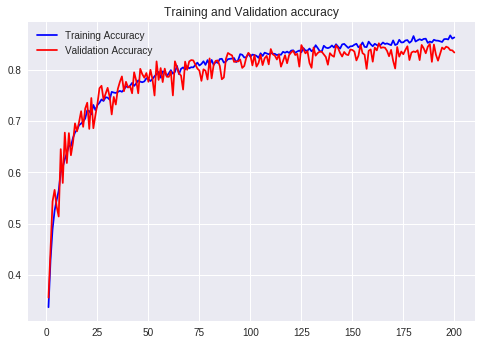

In [12]:
train_acc = metrics.history['acc']
val_acc = metrics.history['val_acc']


epochs = range(1, len(train_acc) + 1)


plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


### Evaluating on test data

In [13]:
metrics_test = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', metrics_test[0])
print('Test accuracy:', metrics_test[1])

10000/10000 [==============================] - 2s 155us/step
Test loss: 0.5243326059818267
Test accuracy: 0.822
